# Get Data

In [2]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json
pip install kaggle
kaggle datasets download -d pdavpoojan/the-rvlcdip-dataset-test
unzip the-rvlcdip-dataset-test -d data

Output hidden; open in https://colab.research.google.com to view.

# Importing Dependices

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
!pip3 install datasets
!pip3 uninstall fsspec --yes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.3 MB/s eta 0:00:00
Found existing installation: fsspec 2023.6.0
Uninstalling fsspec-2023.6.0:
  Successfully uninstalled fsspec-2023.6.0


In [5]:
! pip install transformers datasets
! sudo apt install tesseract-ocr
! pip install pytesseract

import numpy as np
import pandas as pd

import requests, zipfile, io

from sklearn.utils import shuffle

from datasets import Dataset
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 18.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB

# OCR

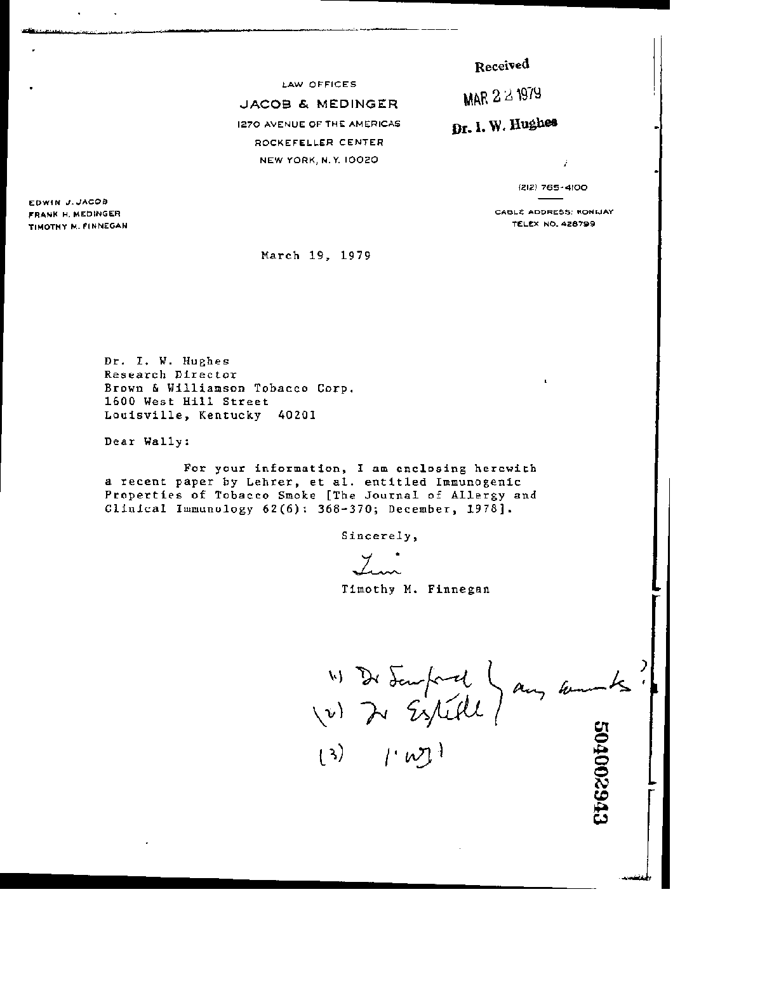

In [6]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/data/test/letter/0000000700.tif")
image = image.convert("RGB")
image

In [7]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'Received Mar 22 1973 1270 AVENUE OF THE AMERICAS pr. 1. W. Hughes 4 Law OFFICES. YACOB & MEDINGER ROCKEFELLER CENTER NEW YORK, N.Y. 10020 Maren 18, 1979 Dr. T. W. Hughes Research Director . Brown & Willianson Tobacco Corp 1600 West Hill Street Lovisvilie, Kentucky 40201 Dear Wally: For your information, I am enclosing herewith a recent paper by Lehrer, et ei. entitled Immunogenic Properties of Tobacco Smoke [The Journal of Allergy and Clinical Tununvlogy 62(6): 368-370; December, 1978]. Sincerely, La Timothy M. Finnegai WO ke Ay bom WD tle Ww pw? epezoobos'

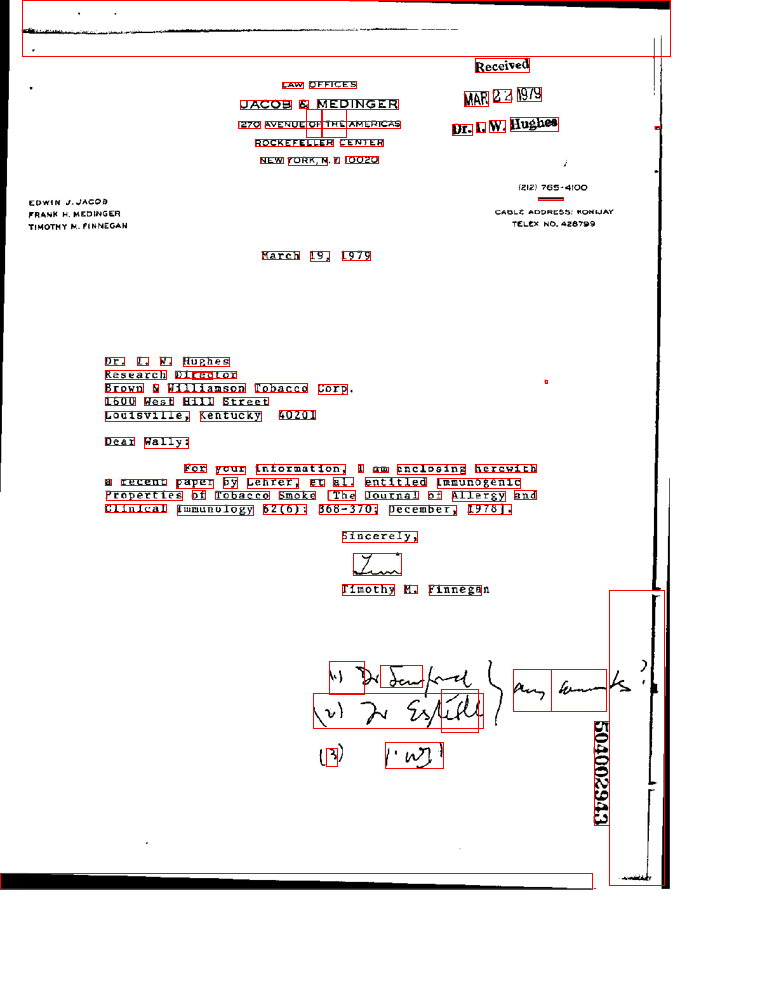

In [8]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

In [9]:
dataset_path = "/content/data/test"
labels = [label for label in os.listdir(dataset_path)]
idx2label = {v: k for v, k in enumerate(labels)}
label2idx = {k: v for v, k in enumerate(labels)}
label2idx

{'questionnaire': 0,
 'memo': 1,
 'budget': 2,
 'file_folder': 3,
 'specification': 4,
 'invoice': 5,
 'resume': 6,
 'advertisement': 7,
 'news_article': 8,
 'email': 9,
 'scientific_publication': 10,
 'presentation': 11,
 'letter': 12,
 'form': 13,
 'handwritten': 14,
 'scientific_report': 15}

In [10]:
data=pd.DataFrame()
i=0
for label in os.listdir(dataset_path):
    count=0
    for filename in os.listdir(dataset_path+'/'+label):

        if '.ipynb' not in filename and count<200:
            data.at[i,'image_path']=dataset_path+'/'+label+'/'+filename
            data.at[i,'label']=label
            i=i+1
            count=count+1


data = shuffle(data)

In [11]:
data.head()

,image_path,label
1216,/content/data/test/resume/50534567-4568.tif,resume
3121,/content/data/test/scientific_report/208269315...,scientific_report
3099,/content/data/test/scientific_report/250159988...,scientific_report
1704,/content/data/test/news_article/1005040212-a.tif,news_article
330,/content/data/test/memo/10045083_10045086.tif,memo


In [12]:
len(data)

3200

In [13]:
data.columns

Index(['image_path', 'label'], dtype='object')

In [14]:
X=data[['image_path']]
y=data[['label']]

In [15]:
X

,image_path
1216,/content/data/test/resume/50534567-4568.tif
3121,/content/data/test/scientific_report/208269315...
3099,/content/data/test/scientific_report/250159988...
1704,/content/data/test/news_article/1005040212-a.tif
330,/content/data/test/memo/10045083_10045086.tif
...,...
1407,/content/data/test/advertisement/2045605094.tif
2235,/content/data/test/presentation/2041865546.tif
1144,/content/data/test/invoice/2041158054.tif
483,/content/data/test/budget/1005063179.tif


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y)

X_valid,X_test,y_valid,y_test=train_test_split(X_val, y_val, test_size=0.5, stratify=y_val)

In [17]:
X_train

,image_path
303,/content/data/test/memo/2022245837.tif
1898,/content/data/test/email/527795189+-5190.tif
1172,/content/data/test/invoice/93495659.tif
2201,/content/data/test/presentation/0060211544.tif
2946,/content/data/test/handwritten/522746868+-6868...
...,...
2977,/content/data/test/handwritten/518305661+-5662...
2523,/content/data/test/letter/1005046793.tif
947,/content/data/test/specification/2069721576.tif
1858,/content/data/test/email/528851578+-1578.tif


In [18]:
train_data=pd.concat([X_train, y_train], axis=1)
valid_data=pd.concat([X_valid, y_valid], axis=1)
test_data=pd.concat([X_test, y_test], axis=1)

In [19]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

1920
640
640


In [20]:
train_size=len(train_data)
validation_size=len(valid_data)
test_size=len(test_data)

# Creating Dataloaders

In [21]:
from datasets import Dataset

def normalize_box(box, width, height):
     return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

def apply_ocr(example):
        # get the image
        image = Image.open(example['image_path'])

        width, height = image.size

        # apply ocr to the image
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df = ocr_df.dropna().reset_index(drop=True)
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_df.text if str(word) != 'nan'])
        words = list(ocr_df.text)
        words = [str(w) for w in words]
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
            actual_boxes.append(actual_box)

        # normalize the bounding boxes
        boxes = []
        for box in actual_boxes:
            boxes.append(normalize_box(box, width, height))

        # add as extra columns
        assert len(words) == len(boxes)
        example['words'] = words
        example['bbox'] = boxes
        return example


In [22]:
train_dataset = Dataset.from_pandas(train_data)
updated_train_dataset = train_dataset.map(apply_ocr)

valid_dataset = Dataset.from_pandas(valid_data)
updated_valid_dataset = valid_dataset.map(apply_ocr)

test_dataset = Dataset.from_pandas(test_data)
updated_test_dataset = test_dataset.map(apply_ocr)

Map:   0%|          | 0/1920 [00:00<?, ? examples/s]

Map:   0%|          | 0/640 [00:00<?, ? examples/s]

Map:   0%|          | 0/640 [00:00<?, ? examples/s]

In [ ]:

updated_train_dataset=updated_train_dataset.remove_columns('__index_level_0__')
updated_valid_dataset=updated_valid_dataset.remove_columns('__index_level_0__')
updated_test_dataset=updated_test_dataset.remove_columns('__index_level_0__')

In [28]:
from transformers import LayoutLMTokenizer
import torch
from datasets import Features, Sequence, ClassLabel, Value, Array2D

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

def encode_example(example, max_seq_length=512, pad_token_box=[0, 0, 0, 0]):
  words = example['words']
  normalized_word_boxes = example['bbox']

  assert len(words) == len(normalized_word_boxes)

  token_boxes = []
  for word, box in zip(words, normalized_word_boxes):
      word_tokens = tokenizer.tokenize(word)
      token_boxes.extend([box] * len(word_tokens))

  # Truncation of token_boxes
  special_tokens_count = 2
  if len(token_boxes) > max_seq_length - special_tokens_count:
      token_boxes = token_boxes[: (max_seq_length - special_tokens_count)]

  # add bounding boxes of cls + sep tokens
  token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]

  encoding = tokenizer(' '.join(words), padding='max_length', truncation=True)
  # Padding of token_boxes up the bounding boxes to the sequence length.
  input_ids = tokenizer(' '.join(words), truncation=True)["input_ids"]
  padding_length = max_seq_length - len(input_ids)
  token_boxes += [pad_token_box] * padding_length
  encoding['bbox'] = token_boxes
  encoding['label'] = label2idx[example['label']]

  assert len(encoding['input_ids']) == max_seq_length
  assert len(encoding['attention_mask']) == max_seq_length
  assert len(encoding['token_type_ids']) == max_seq_length
  assert len(encoding['bbox']) == max_seq_length

  return encoding

In [27]:
features = Features({
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'label': ClassLabel(names=['questionnaire', 'memo', 'budget', 'file_folder', 'specification', 'invoice', 'resume',
                               'advertisement', 'news_article', 'email', 'scientific_publication', 'presentation',
                               'letter', 'form', 'handwritten', 'scientific_report']),
    'image_path': Value(dtype='string'),
    'words': Sequence(feature=Value(dtype='string')),
})

In [29]:
encoded_train_dataset = updated_train_dataset.map(lambda example: encode_example(example),
                                      features=features)

encoded_train_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])


encoded_valid_dataset = updated_valid_dataset.map(lambda example: encode_example(example),
                                      features=features)

encoded_valid_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

encoded_test_dataset = updated_test_dataset.map(lambda example: encode_example(example),
                                      features=features)

encoded_test_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

Map:   0%|          | 0/1920 [00:00<?, ? examples/s]

Map:   0%|          | 0/640 [00:00<?, ? examples/s]

Map:   0%|          | 0/640 [00:00<?, ? examples/s]

In [30]:
train_dataloader = torch.utils.data.DataLoader(encoded_train_dataset, batch_size=5, shuffle=True)
validation_dataloader = torch.utils.data.DataLoader(encoded_valid_dataset, batch_size=2, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(encoded_test_dataset, batch_size=1, shuffle=True)

# Importing LayoutLM

In [34]:
from transformers import LayoutLMForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForSequenceClassification.from_pretrained("microsoft/layoutlm-base-uncased", num_labels=len(label2idx))
model.to(device)

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForSequenceClassification were not initialized from the model checkpoint 

LayoutLMForSequenceClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0-11): 12 x LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True

# Training the Model

In [35]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 41
t_total = len(train_dataloader) * num_train_epochs # total number of training steps


for epoch in range(num_train_epochs):
  print("Epoch:", epoch)
  running_loss = 0.0
  correct = 0
  model.train()
  for batch in train_dataloader:
      input_ids = batch["input_ids"].to(device)
      bbox = batch["bbox"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      token_type_ids = batch["token_type_ids"].to(device)
      labels = batch["label"].to(device)

      # forward pass
      outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids,
                      labels=labels)
      loss = outputs.loss

      running_loss += loss.item()
      predictions = outputs.logits.argmax(-1)
      correct += (predictions == labels).float().sum()

      # backward pass to get the gradients
      loss.backward()

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1

  print("Loss:", running_loss / batch["input_ids"].shape[0])
  accuracy = 100 * correct / train_size
  print("Training accuracy:", accuracy.item())

  if epoch%5==0:
    model.eval()

    correct = 0
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        bbox = batch["bbox"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)
        outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
        predictions = outputs.logits.argmax(-1)
        correct += (predictions == labels).float().sum()

    accuracy = 100 * correct / validation_size
    print("Validation accuracy:", accuracy.item())

Epoch: 0
Loss: 121.92459450364113
Training accuracy: 54.94791793823242
Validation accuracy: 75.3125
Epoch: 1
Loss: 57.067960859835146
Training accuracy: 80.15625762939453
Epoch: 2
Loss: 37.243892441689965
Training accuracy: 86.30208587646484
Epoch: 3
Loss: 28.810206375271083
Training accuracy: 89.27083587646484
Epoch: 4
Loss: 21.264073539711536
Training accuracy: 91.77083587646484
Epoch: 5
Loss: 19.85787220466882
Training accuracy: 93.02083587646484
Validation accuracy: 75.625
Epoch: 6
Loss: 13.325495929457247
Training accuracy: 94.63542175292969
Epoch: 7
Loss: 10.766207863483578
Training accuracy: 95.83333587646484
Epoch: 8
Loss: 11.739726289408281
Training accuracy: 95.83333587646484
Epoch: 9
Loss: 18.47605390683748
Training accuracy: 93.17708587646484
Epoch: 10
Loss: 14.564409215934575
Training accuracy: 94.63542175292969
Validation accuracy: 77.96875
Epoch: 11
Loss: 11.329655681736767
Training accuracy: 95.72917175292969
Epoch: 12
Loss: 7.998035320150666
Training accuracy: 97.03125

In [36]:
model.save_pretrained("models/document_model/")

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
!zip -r /content/LM_Model.zip /content/models/document_model

  adding: content/models/document_model/ (stored 0%)
  adding: content/models/document_model/pytorch_model.bin (deflated 8%)
  adding: content/models/document_model/config.json (deflated 61%)


In [39]:
!cp /content/LM_Model.zip /content/drive/MyDrive/

In [40]:
torch.save(model.state_dict(), 'model.pth')

In [41]:
tokenizer.save_pretrained('LM_tokenizer')

('LM_tokenizer/tokenizer_config.json',
 'LM_tokenizer/special_tokens_map.json',
 'LM_tokenizer/vocab.txt',
 'LM_tokenizer/added_tokens.json')

In [42]:
!zip -r /content/LM_tokenizer.zip /content/LM_tokenizer

  adding: content/LM_tokenizer/ (stored 0%)
  adding: content/LM_tokenizer/tokenizer_config.json (deflated 48%)
  adding: content/LM_tokenizer/special_tokens_map.json (deflated 42%)
  adding: content/LM_tokenizer/vocab.txt (deflated 53%)


In [44]:
!cp /content/LM_tokenizer.zip /content/drive/MyDrive/

# Evaluation

In [43]:
model.eval()
labels_output=[]
predictions_output=[]


correct = 0
for batch in test_dataloader:
    input_ids = batch["input_ids"].to(device)
    bbox = batch["bbox"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    token_type_ids = batch["token_type_ids"].to(device)
    labels = batch["label"].to(device)
    outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
    predictions = outputs.logits.argmax(-1)
#     print(labels)
#     print(predictions)
    correct += (predictions == labels).float().sum()
#     print(correct)

accuracy = 100 * correct / test_size
print("Testing accuracy:", accuracy.item())

Testing accuracy: 70.0
